In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.describe()
#38% out of the training-set survived the Titanic. 
#the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.Survived.unique()
#0 means dead, 1 means survived

array([0, 1], dtype=int64)

In [9]:
data.Survived.value_counts()
#we can see that category 0 has larger number of values

0    549
1    342
Name: Survived, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Visualising survived column

<AxesSubplot:xlabel='Survived', ylabel='count'>

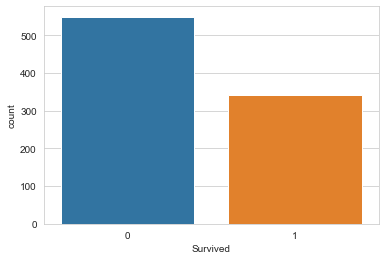

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

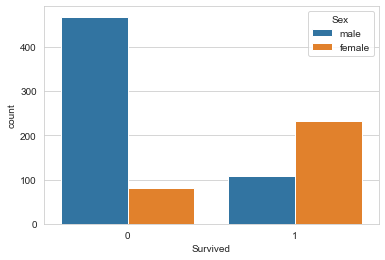

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

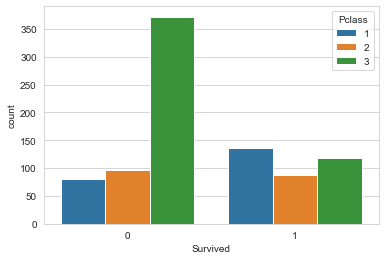

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

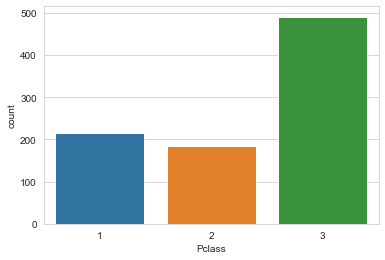

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=data)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

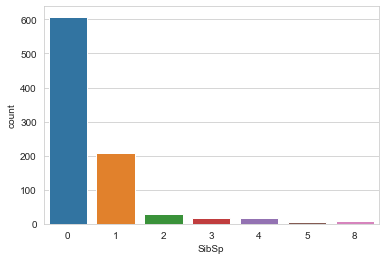

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

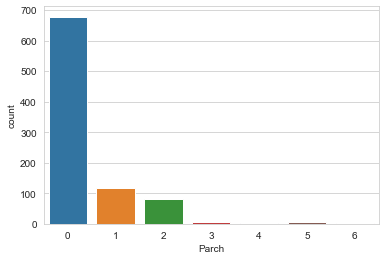

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',data=data)

<AxesSubplot:>

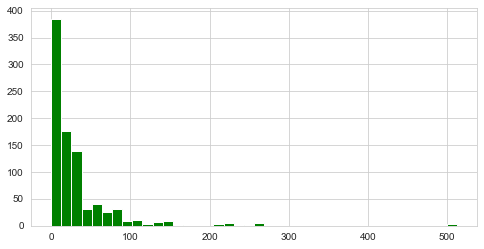

In [17]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

Data Cleaning

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# from the above data we can see that there are missing values in age, cabin and embarked

<AxesSubplot:>

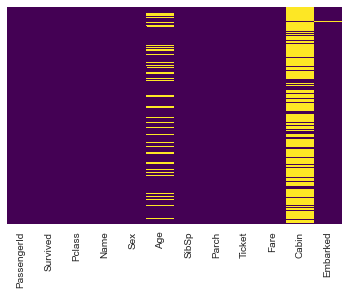

In [20]:
#to see the missing values in graphical format we will use the heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#we have set the yticklabels to false because if we set it true all the values will be visible and it get very shabby 
#a colorbar i.e, cbar is used to show the range of

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

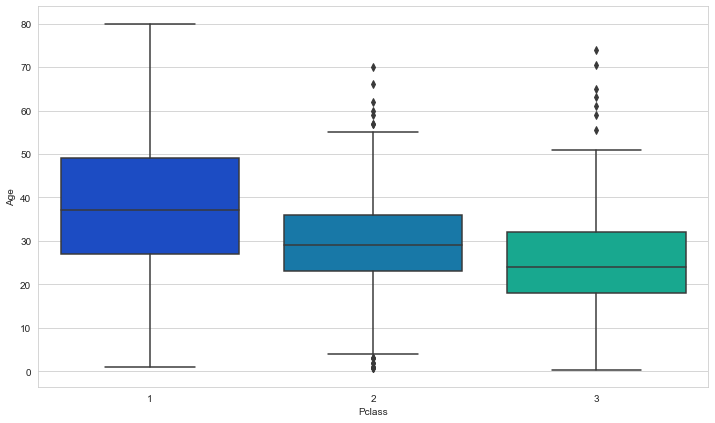

In [21]:
#to fill the missing values in age will find the average age from all the passenger classes and fill the missing values with average age.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [23]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

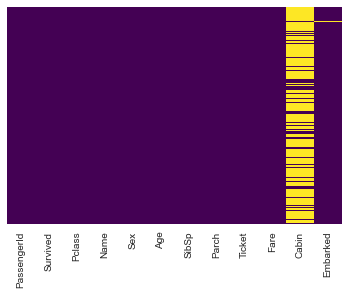

In [24]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
#here we see that , more than 70% of the data is missing in the Cabin column, so will drop the column.
data=data.drop(['Cabin'],axis=1)
data
#we use axis=1, for it to go along columns direction

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

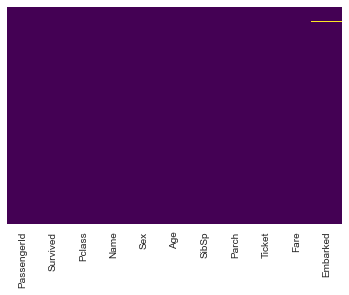

In [26]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
data.dropna(inplace=True)

<AxesSubplot:>

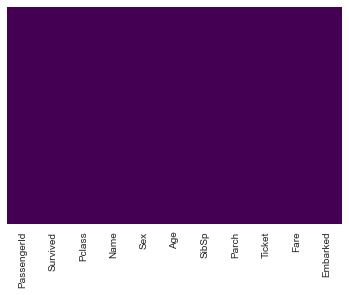

In [28]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features

In [29]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [31]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [33]:
data = pd.concat([data,sex,embark],axis=1)

In [34]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Train Test split

In [35]:
data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [36]:
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [39]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Training and prediction

Applying SVM

In [42]:
from sklearn.svm import SVC
SVMmodel = SVC()
SVMmodel.fit(X_train, y_train)
predictions_y = SVMmodel.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,predictions_y)
svm_cm

array([[152,  11],
       [ 34,  70]], dtype=int64)

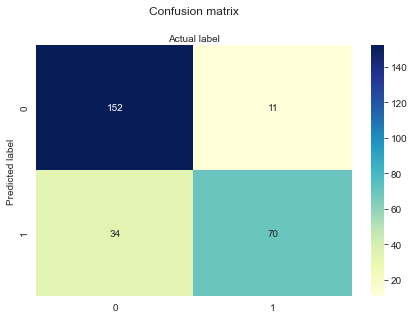

In [44]:
class_names=[1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(svm_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test,predictions_y)
accuracy_svm

0.8314606741573034

Applying logitsics regression

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test,y_pred)
log_cm

array([[147,  16],
       [ 31,  73]], dtype=int64)

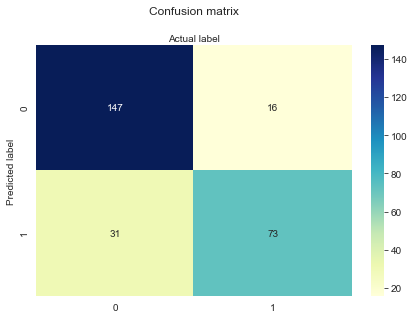

In [49]:
class_names=[1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(log_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score
accuracy_logit = accuracy_score(y_test,y_pred)
accuracy_logit

0.8239700374531835

Applying decision tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, y_train)
y_predict = treeModel.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
dc_cm = confusion_matrix(y_test,y_predict)
dc_cm

array([[132,  31],
       [ 34,  70]], dtype=int64)

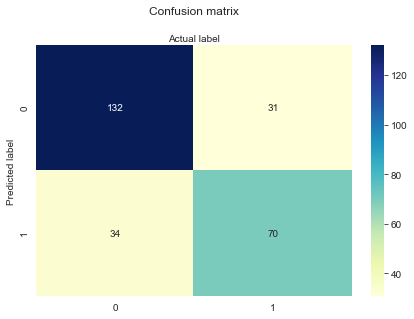

In [53]:
class_names=[1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(dc_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.7565543071161048

In [55]:
pd.DataFrame({'Classifier':['SVM','Logistics Regression','Decision Tree'],'Accuracy score':[
accuracy_svm,accuracy_logit,accuracy]})

,Classifier,Accuracy score
0,SVM,0.831461
1,Logistics Regression,0.823970
2,Decision Tree,0.756554


### Conclusion: Out of the three models, SVM is the best.